# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [49]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

## Load Dataset

In [8]:
df = pd.read_csv("news_data.csv")

In [10]:
df.sample(10)

,id,kode_provinsi,nama_provinsi,judul_berita,klasifikasi_utama,klasifikasi_menyinggung,status_berita,bulan,jumlah_aduan,satuan,tahun
53,54,32,JAWA BARAT,KOMINFO LUNCURKAN APLIKASI PEDULI LINDUNGI,0,0,BENAR,APRIL,17,ADUAN,2020
22,23,32,JAWA BARAT,"INFO DARI DUBES KBRI : JANGAN MAKAN DULU PRODUKSI NEGERI CINA, PEKERJA PABRIKNYA PENGIDAP VIRUS CARONA",0,0,DISINFORMASI (HOAKS),FEBRUARI,5,ADUAN,2020
349,350,32,JAWA BARAT,SMS PEMBERITAHUAN PEMENANG UNDIAN KE-2 DARI PT SHOPEE SEBESAR RP 185 JUTA,EKONOMI,EKONOMI,DISINFORMASI (HOAKS),DESEMBER,3,ADUAN,2021
56,57,32,JAWA BARAT,PROGRAM KARTU PRAKERJA DARI DISNAKERTRANS JABAR,0,0,BENAR,APRIL,11,ADUAN,2020
185,186,32,JAWA BARAT,DAFTAR PRAKERJA MELALUI SITUS HTTPS://PRAKERJA.VIP,HUKUM DAN REGULASI,HUKUM DAN REGULASI,DISINFORMASI (HOAKS),JANUARI,7,ADUAN,2021
218,219,32,JAWA BARAT,VAKSINASI COVID-19 UNTUK LANSIA (USIA DIATAS 60) BISA TANPA ONLINE LANGSUNG DATANG KE LOKASI,KESEHATAN,KESEHATAN,DISINFORMASI (HOAKS),MARET,5,ADUAN,2021
148,149,32,JAWA BARAT,SINOVAC YANG AKAN DIVAKSINKAN KE 175 JUTA RAKYAT INDONESIA TERNYATA VAKSIN BERBAHAYA,KESEHATAN,KESEHATAN,MISINFORMASI (HOAKS),OKTOBER,5,ADUAN,2020
180,181,32,JAWA BARAT,STATUS BERLOGO WHATSAPP ADALAH PENIPUAN UNTUK ALIHKAN DATA PRIBADI DAN REKENING BANK,TEKNOLOGI,TEKNOLOGI,DISINFORMASI (HOAKS),JANUARI,25,ADUAN,2021
5,6,32,JAWA BARAT,DUA LAKI-LAKI PENIPU MENCARI DANA PAKAI BAJU LAMBANG PANCASILA,0,0,DISINFORMASI (HOAKS),JANUARI,3,ADUAN,2020
320,321,32,JAWA BARAT,LINK SUBSIDI DARI PERTAMINA VIA SMS RP. 189 JUTA,KRIMINALITAS,KRIMINALITAS,DISINFORMASI (HOAKS),OKTOBER,2,ADUAN,2021


The columns that we will be focus on for this project is only "judul berita" (news title) and "status berita" (the label of the news). But let's check for overview of the entire dataset first.

In [11]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 361
Number of columns 11


In [12]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,id,int64,0,0.0,0,361,"[1, 2, 3, 4, 5]"
1,kode_provinsi,int64,0,0.0,0,1,[32]
2,nama_provinsi,object,0,0.0,0,1,[JAWA BARAT]
3,judul_berita,object,0,0.0,0,328,"[RS HASAN SADIKIN BANDUNG ISOLASI PASIEN TERDUGA VIRUS CORONA, SELEBARAN BERLOGO POLDA METRO JAYA : WASPADA PENCULIKAN ANAK 12 TAHUN, PELAKU MENYAMAR SEBAGAI BUMIL, ARTI HURUF ARAB PADA BUKU IQRA 1, CORONA DICIPTAKAN PADA ZAMAN PENUH KEBOHONGAN, CIPANAS (PUNCAK) BARU SAJA DILANDA BANJIR BANDANG, ALIRAN AIRNYA BISA MASUK JKT BESOK PAGI, DITOLAK DI BERBAGAI NEGARA, RATUSAN TURIS CHINA DISAMBUT DI INONESIA]"
4,klasifikasi_utama,object,0,0.0,0,19,"[0, KRIMINALITAS, EKONOMI, HUKUM DAN REGULASI, PENDIDIKAN]"
5,klasifikasi_menyinggung,object,0,0.0,0,20,"[0, KRIMINALITAS, EKONOMI, POLITIK, HUKUM DAN REGULASI]"
6,status_berita,object,0,0.0,0,4,"[BENAR, DISINFORMASI (HOAKS), MISINFORMASI (HOAKS), 0]"
7,bulan,object,0,0.0,0,12,"[JANUARI, FEBRUARI, MARET, APRIL, MEI]"
8,jumlah_aduan,int64,0,0.0,0,39,"[19, 6, 3, 2, 22]"
9,satuan,object,0,0.0,0,1,[ADUAN]


In [28]:
# Focus the dataframe for sentiment analysis
df = df[["judul_berita", "status_berita"]]
df

,judul_berita,status_berita
0,RS HASAN SADIKIN BANDUNG ISOLASI PASIEN TERDUGA VIRUS CORONA,BENAR
1,"SELEBARAN BERLOGO POLDA METRO JAYA : WASPADA PENCULIKAN ANAK 12 TAHUN, PELAKU MENYAMAR SEBAGAI BUMIL",DISINFORMASI (HOAKS)
2,"ARTI HURUF ARAB PADA BUKU IQRA 1, CORONA DICIPTAKAN PADA ZAMAN PENUH KEBOHONGAN",DISINFORMASI (HOAKS)
3,"CIPANAS (PUNCAK) BARU SAJA DILANDA BANJIR BANDANG, ALIRAN AIRNYA BISA MASUK JKT BESOK PAGI",DISINFORMASI (HOAKS)
4,"DITOLAK DI BERBAGAI NEGARA, RATUSAN TURIS CHINA DISAMBUT DI INONESIA",BENAR
...,...,...
356,AKUN WHATSAPP MENGATASNAMAKAN KAPOLDA JAWA BARAT AHMAD DOFIRI,DISINFORMASI (HOAKS)
357,BEJAT! GURU NGAJI DI DEPOK CABULI 10 ANAK MURIDNYA,BENAR
358,BENARKAH JANTUNG MANUSIA BERHENTI BERDETAK SAAT BERSIN?,DISINFORMASI (HOAKS)
359,BENARKAH KONSUMSI SAYUR PAKIS MENGAKIBATKAN KANKER LAMBUNG,DISINFORMASI (HOAKS)


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [31]:
df.describe()

,judul_berita,status_berita
count,361,361
unique,328,4
top,DAFTAR PRAKERJA MELALUI SITUS HTTPS://PRAKERJA.VIP,DISINFORMASI (HOAKS)
freq,4,236


We can see that, if we select only the title and the label, some of the data actually duplicated, so we will need to erase them first.

In [29]:
# Checking the amount of label for each
df['status_berita'].value_counts()

status_berita
DISINFORMASI (HOAKS)    236
BENAR                    85
MISINFORMASI (HOAKS)     36
0                         4
Name: count, dtype: int64

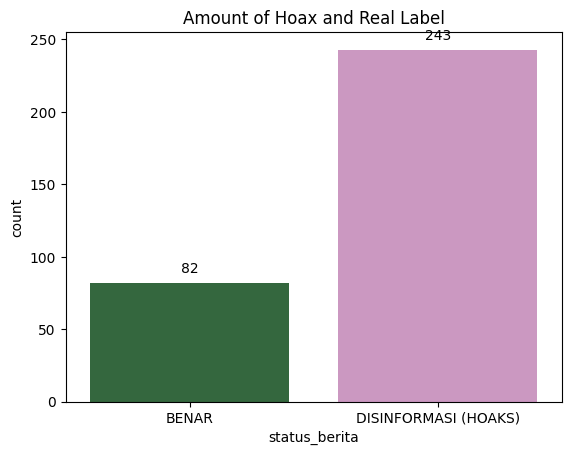

In [51]:
# (additional) If wanted to plot them
# ax = df["status_berita"].value_counts().plot(kind="bar")
ax = sns.countplot(data = df, x="status_berita", palette = "cubehelix")
plt.title("Amount of Hoax and Real Label")

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(
        text=f'{int(p.get_height())}',             # The text to display (the height of the bar)
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),  # The position to place the text (centered on the bar)
        ha='center',                               # Horizontal alignment of the text
        va='center',                               # Vertical alignment of the text
        xytext=(0, 10),                            # Offset of the text from the bar (in points)
        textcoords='offset points'                 # Specifies that `xytext` is an offset in points
    )

# **DATA PREPROCESSING**

### Dropping Duplicated Data

In [46]:
# Handle duplicate data
print(f"Amount of duplicated data : {df.duplicated(subset="judul_berita").sum()}")

df = df.drop_duplicates(subset="judul_berita")
print(f"Amount of duplicated data : {df.duplicated(subset="judul_berita").sum()}")

Amount of duplicated data : 0
Amount of duplicated data : 0


### Cleaning Null Data & Similar Hoax Name

We will need to fix the label here with several steps :
- Delete the 0 label
- Replace the MISINFORMASI (HOAKS) with DISINFORMASI (HOAKS) since they are the same

In [47]:
# Handling inconsistent value
df = df[df["status_berita"] != "0"]
df["status_berita"] = df["status_berita"].replace("MISINFORMASI (HOAKS)", "DISINFORMASI (HOAKS)")

### Counting The Length of Each News' Title

In [52]:
df['title_length'] = df['judul_berita'].apply(len)

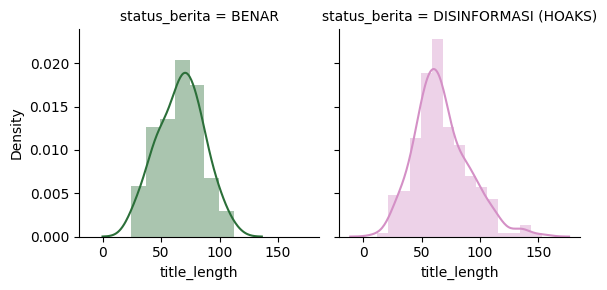

In [55]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(sns.distplot, 'title_length')